In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
pd.set_option('display.precision',4)

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("uk_econcomic.csv")

1.	Crude birth rate and death rate per year
2.	Life expectancy total and compare with male and female per year
3.	Population Vs GDP use year as hue. GDP has dropped as population increased. 2007 was the most than fell during recession.  2014 and than dropped again
4.	Divide GDP growth or amount into two groups and plot one beside the other. Year from 1973 – 1994, 1995-2017
5.	Imports vs exports.. imports have increased than exports
6.	Merchandise imports and exports of UK. Have an eye on the y-axis. Imports for agriculture, food and fuel are more than exports. Manufacturing and ores exports are more than imports.
7.	Commercial service: Insurance and Computer import is higher than exports but travel and transport services import is higher than exports. Both 5 and 6 means that poor and people not living in urban area were more hit.
8.	% or rural and % of urban is a better indicator because of the same scale. Make a plot with numbers and say it is not good. Plot rural vs another with hue as year and it shows that there is a decrease 
9.	Youth unemployment : most affected with 2004 starting unlike just around recession. Check for other countries
10.	Part time employment for females is twice as much as for males. No need for labour participation


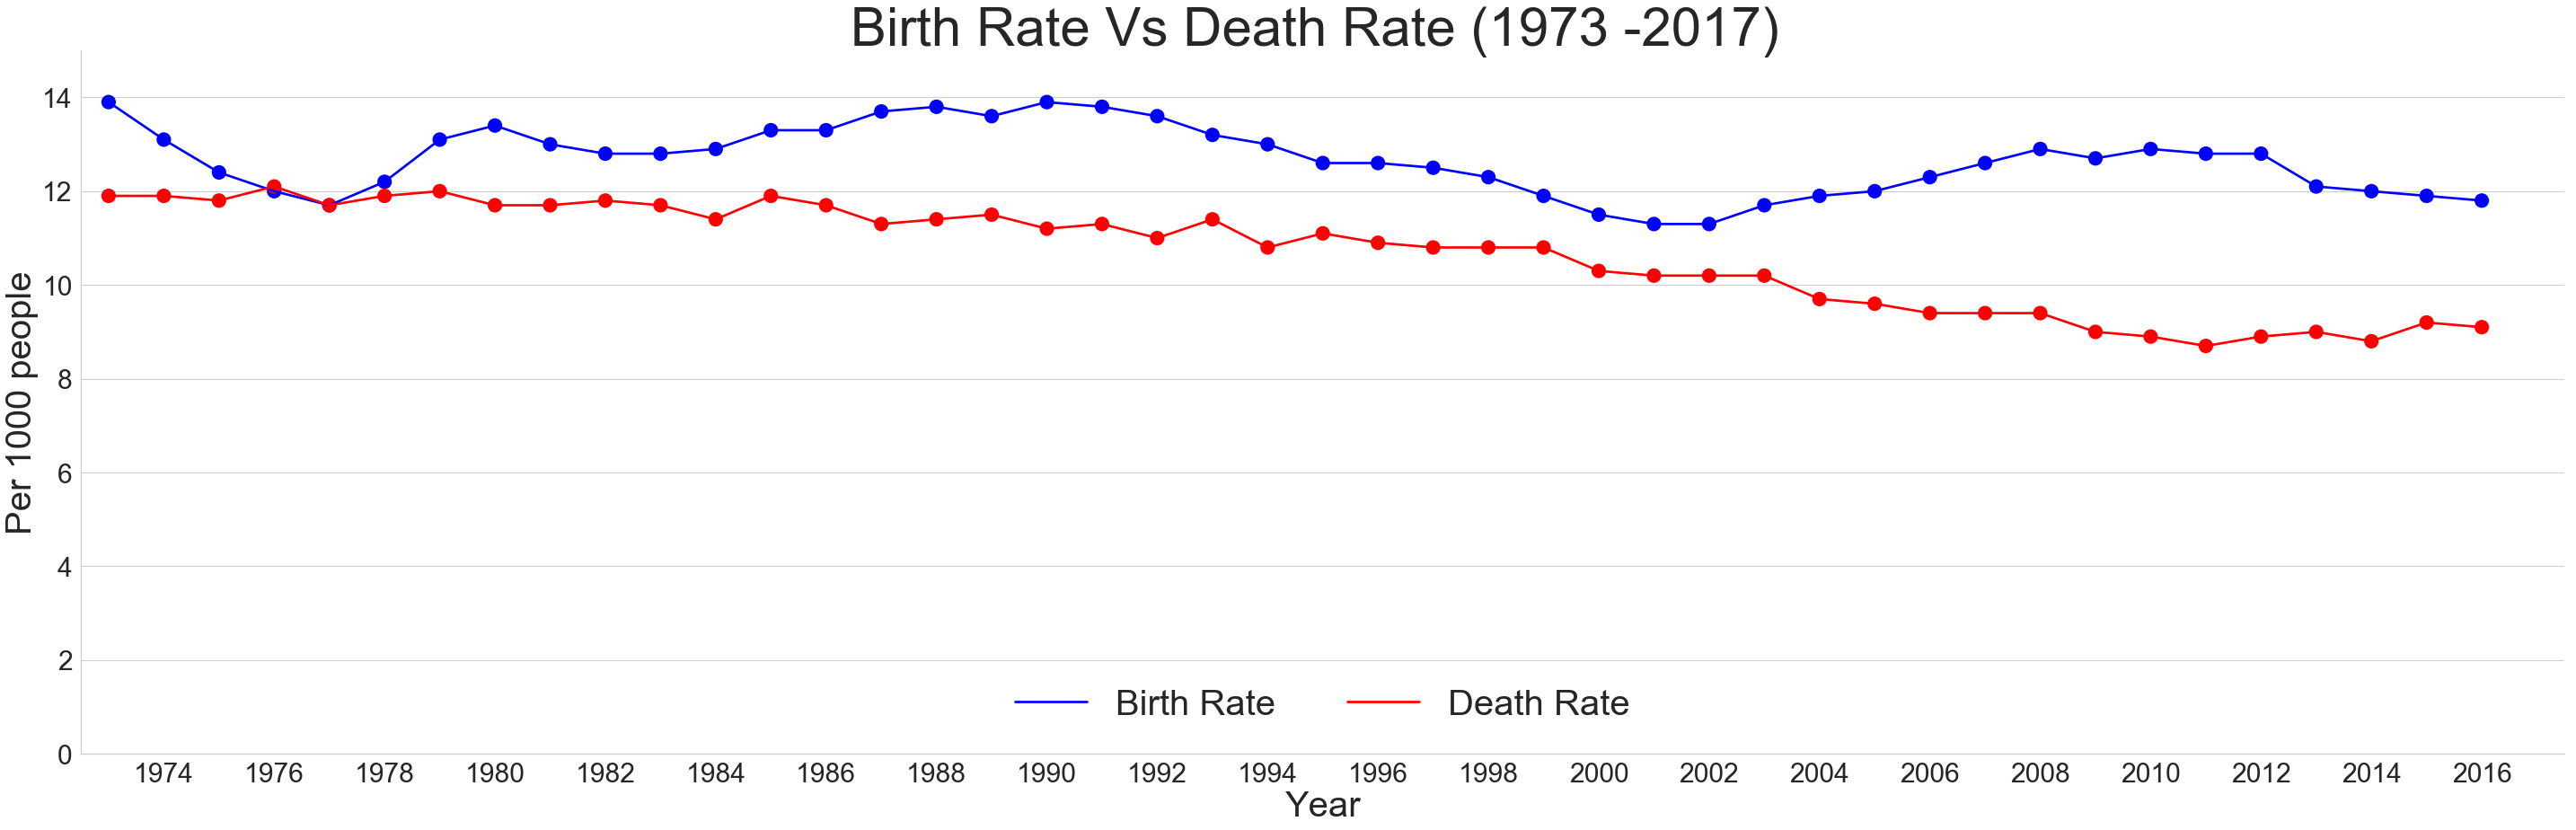

In [3]:
y_title_margin = 1.2
x_title_margin = 1.2
sns.set(style="whitegrid")
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 4))
#two plots together
f, (ax1) = plt.subplots(1,figsize=(40, 13))

sns.pointplot(x= "Year",y='Birth rate, crude (per 1,000 people)',  data=df, ax=ax1,color='blue', label='Birth Rate')
sns.pointplot(x="Year", y="Death rate, crude (per 1,000 people)", data=df, ax=ax1,color='red', label='Death Rate')

# Plot the total 
sns.set_color_codes("deep")
#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()

plt.title('Birth Rate Vs Death Rate (1973 -2017) ', fontsize= 60)
plt.xlabel('Year', fontsize= 40)
plt.xticks(fontsize=30)
plt.ylabel('Per 1000 people', fontsize= 40)
plt.yticks(fontsize=30)
ax1.set_ylim(0,15)
#skip every one x-tick for cleanliness
plt.setp(ax1.get_xticklabels()[::2], visible=False)
#Plot the legend in in the center
#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
ax1.legend(handles=ax1.lines[::len(df)+1], labels=["Birth Rate","Death Rate"],frameon=False, loc='lower center', ncol=2,fontsize= 40)

ax1.set_xticklabels([t.get_text().split("T")[0] for t in ax1.get_xticklabels()])
plt.setp(ax1.collections, sizes=[200])
#plt.gcf().autofmt_xdate()
plt.tight_layout()
#plt.show()
plt.savefig("birthDeath.png")

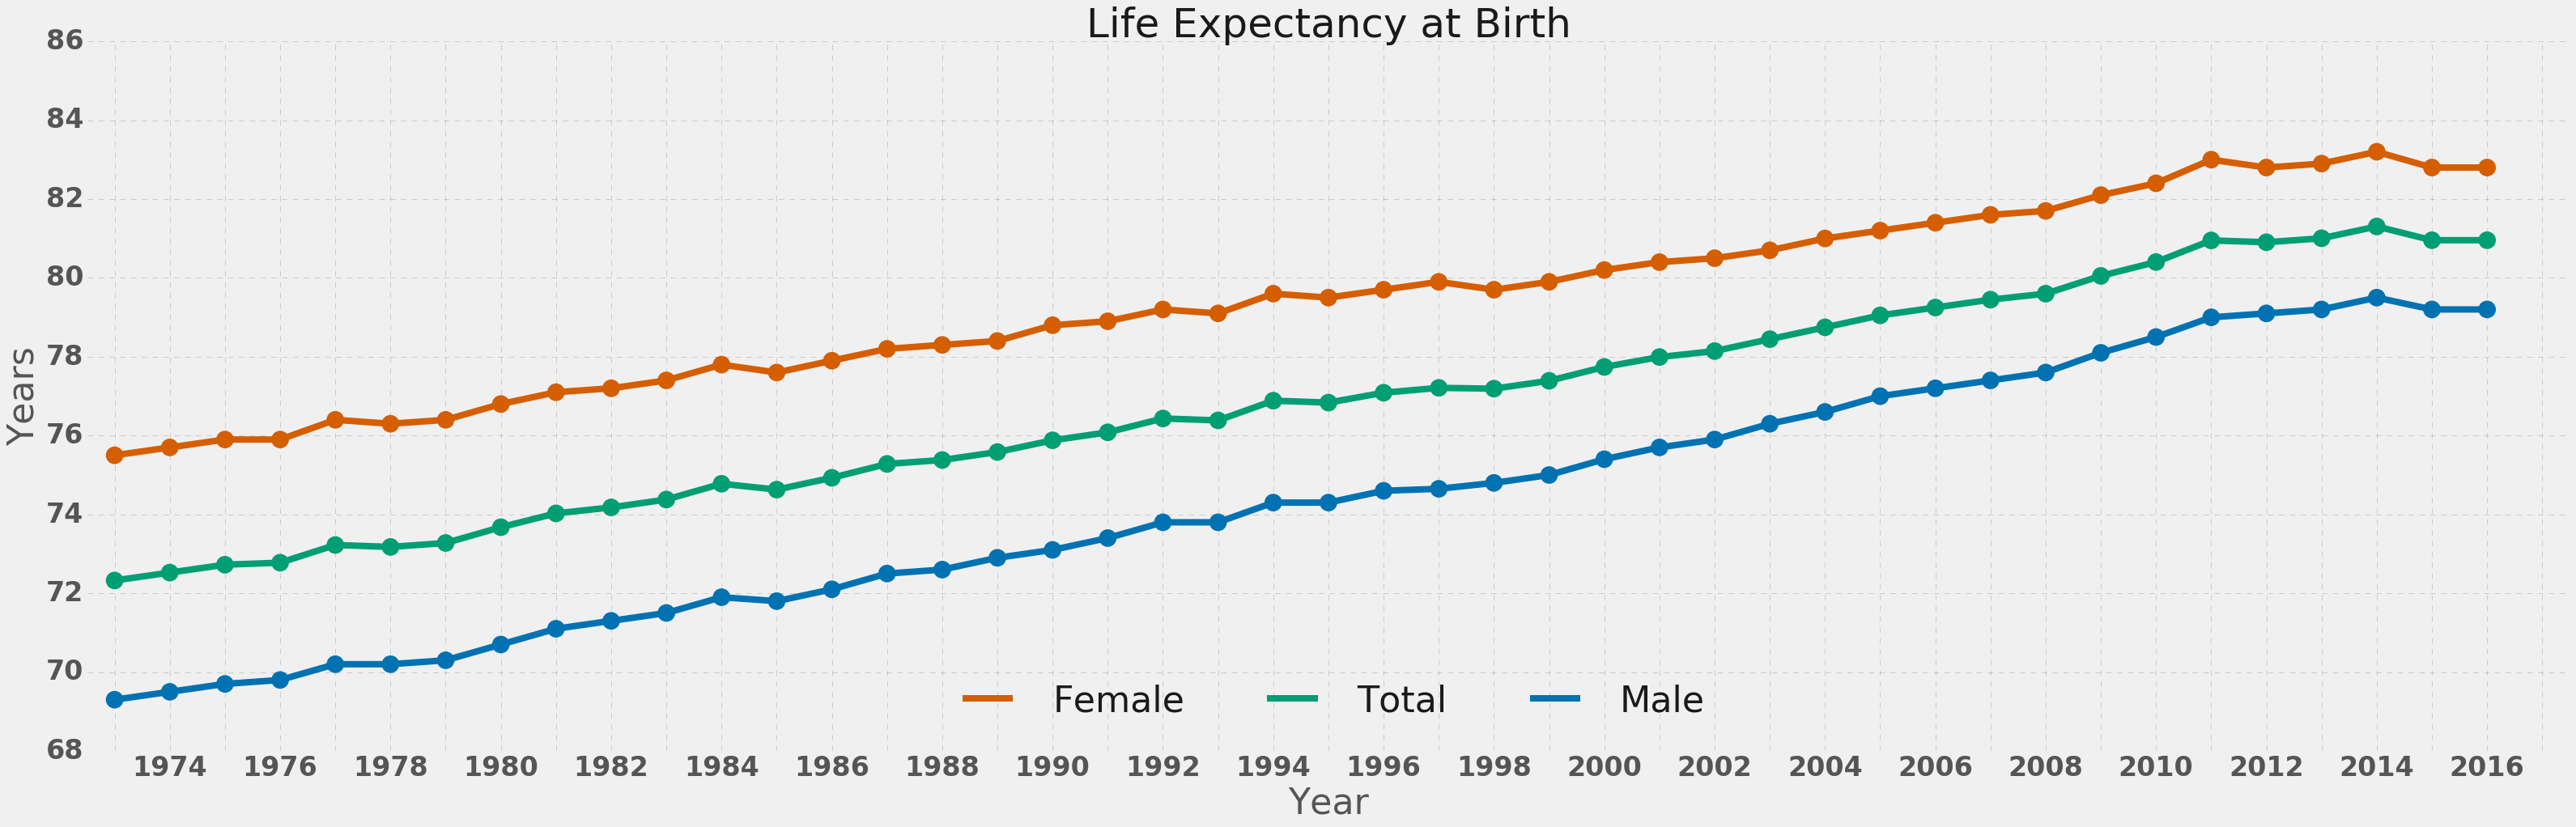

In [47]:
y_title_margin = 1.2
x_title_margin = 1.2
import matplotlib.style as style
style.use('fivethirtyeight')
#sns.set(style="whitegrid")
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 4))
#two plots together
f, (ax1) = plt.subplots(1,figsize=(40, 13))
colors = [[213/255,94/255,0], [0,114/255,178/255],   
          [0,0,0], [230/255,159/255,0],[86/255,180/255,233/255],[0,158/255,115/255]]


sns.pointplot(x= "Year",y='Life expectancy at birth, female (years)',  data=df, ax=ax1,color=colors[0], label='Female')
sns.pointplot(x="Year", y='Life expectancy at birth, total (years)', data=df, ax=ax1,color=colors[5], label='Total')
sns.pointplot(x="Year", y='Life expectancy at birth, male (years)', data=df, ax=ax1,color=colors[1], label='Male')

# Plot the total 
sns.set_color_codes("deep")
#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()

plt.title('Life Expectancy at Birth', fontsize= 45)
plt.xlabel('Year', fontsize= 40)
plt.xticks(fontsize=30, weight = 'bold')
plt.ylabel('Years', fontsize= 40)
plt.yticks(fontsize= 30, weight = 'bold')
#skip every one x-tick for cleanliness
plt.setp(ax1.get_xticklabels()[::2], visible=False)
ax1.legend(handles=ax1.lines[::len(df)+1], labels=["Female","Total","Male"],frameon=False, loc='lower center', ncol=3,fontsize= 40)

ax1.set_xticklabels([t.get_text().split("T")[0] for t in ax1.get_xticklabels()])
plt.setp(ax1.collections, sizes=[200])
# #plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# Remove the plot frame lines. They are unnecessary here.
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
#plt.show()
plt.savefig("lifeexpectancy.png")

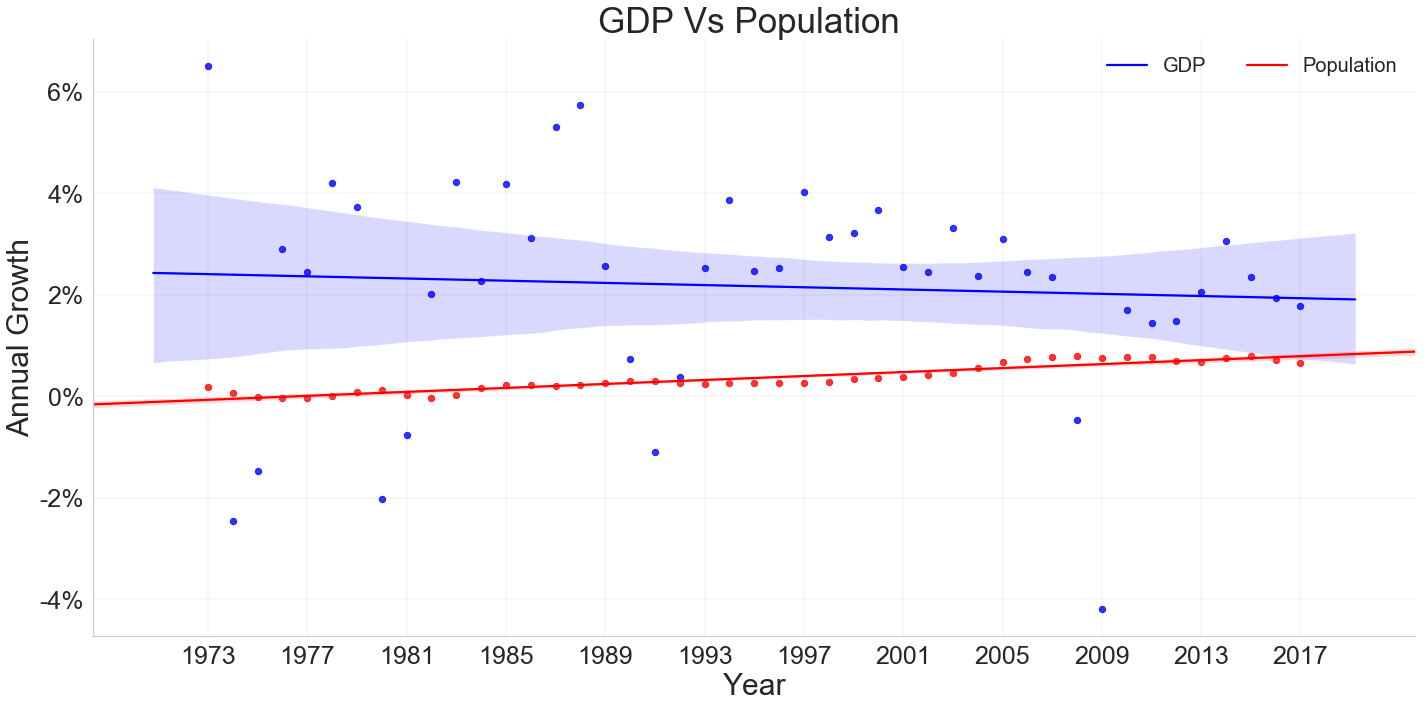

In [13]:
f, (ax1) = plt.subplots(1,figsize=(20, 10))

sns.regplot(x= "Year",y='GDP growth (annual %)',  data=df, ax=ax1, color='blue', scatter_kws={'s':40})
sns.regplot(x="Year", y="Population growth (annual %)", data=df, ax=ax1,color='red', scatter_kws={'s':40})

# Plot the total 
sns.set_color_codes("deep")
#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()

plt.title('GDP Vs Population ', fontsize= 35)
plt.xlabel('Year', fontsize= 30)
plt.xticks(fontsize=25)
plt.ylabel('Annual Growth', fontsize= 30)
plt.yticks(fontsize=25)
#ax1.set_ylim(0,15)

#Plot the legend in in the center
#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
ax1.legend(labels=["GDP","Population"],frameon=False, loc='upper right', ncol=2,fontsize= 20)
ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
#ax1.set_xticklabels([t.get_text().split("T")[0] for t in ax1.get_xticklabels()])
#plt.setp(ax1.get_xticklabels()[::2], visible=False)
plt.xticks(df['Year'][::4])
#plt.gcf().autofmt_xdate()
plt.tight_layout()
#plt.show()
plt.savefig("gdpPop.png")

In [60]:
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
#https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm
dfgdp = df[['GDP growth (annual %)', 'Exports of goods and services (% of GDP)','Tax revenue (% of GDP)',
       'Trade (% of GDP)', 'Trade in services (% of GDP)']]
dfgdp.columns = ['GDP growth (annual %)', 'Exports (% of GDP)','Tax revenue (% of GDP)',
       'Trade (% of GDP)', 'Trade in services (% of GDP)']

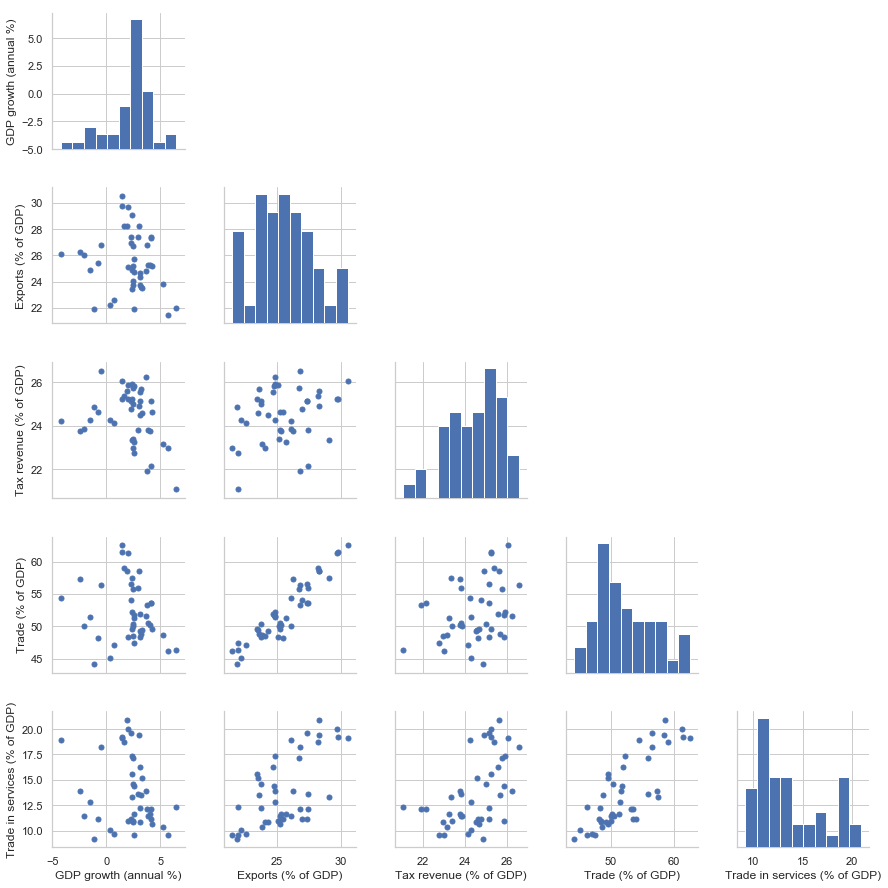

In [72]:
g = sns.pairplot(dfgdp.dropna(), palette="PuBuGn_d", plot_kws=dict(s=25, edgecolor="b", linewidth=1));
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.savefig("pairplotgdp.png")

In [37]:
df['Year']

0     1973
1     1974
2     1975
3     1976
4     1977
5     1978
6     1979
7     1980
8     1981
9     1982
10    1983
11    1984
12    1985
13    1986
14    1987
15    1988
16    1989
17    1990
18    1991
19    1992
20    1993
21    1994
22    1995
23    1996
24    1997
25    1998
26    1999
27    2000
28    2001
29    2002
30    2003
31    2004
32    2005
33    2006
34    2007
35    2008
36    2009
37    2010
38    2011
39    2012
40    2013
41    2014
42    2015
43    2016
44    2017
Name: Year, dtype: int64

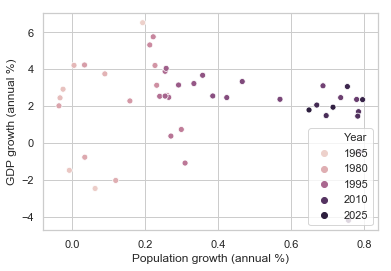

In [36]:
#df['Population, total'] = df['Population, total'].astype(float)
#df['GDP (current US$)'] = df['GDP (current US$)'].astype(float)
# use the function regplot to make a scatterplot
sns.scatterplot(x='Population growth (annual %)', y= 'GDP growth (annual %)', hue ='Year', data =df)

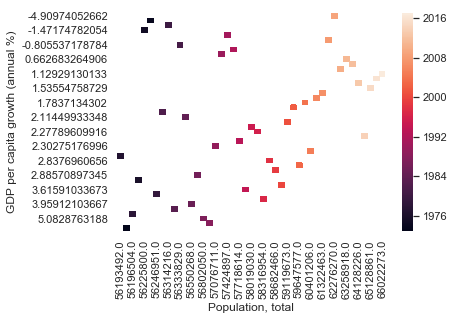

In [18]:
dfg = df[['GDP per capita growth (annual %)', 'Population, total', 'Year']]
col = dfg.pivot('GDP per capita growth (annual %)', 'Population, total', 'Year')
ax = sns.heatmap(col)

In [25]:
#Two plots if neeeded
# sns.set(style="whitegrid")
# # Initialize the matplotlib figure
# #f, ax = plt.subplots(figsize=(30, 4))
# #two plots together
# f, (ax1, ax2) = plt.subplots(2,figsize=(50, 30))

# sns.lineplot(x= "Year",y='Birth rate, crude (per 1,000 people)',  data=dfe, ax=ax1)
# sns.lineplot(x="Year", y="Death rate, crude (per 1,000 people)", data=dfe, ax=ax2)

# # Plot the total crashes
# sns.set_color_codes("deep")
# #sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
# #sns.despine()
# # plt.title('Total GDP in UK ', fontsize= 15)
# # plt.xlabel('Year', fontsize= 15)
# # plt.ylabel('GDP (current US$)', fontsize= 15)
# # plt.show()

###### Divide 44 years into section to compare the difference between the first 22 years since joining the eu and the other 22 years before leaving the eu

In [13]:
df1 = dfe[dfe['Year'].isin([1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994])]

df2 = dfe[dfe['Year'].isin([1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017])]

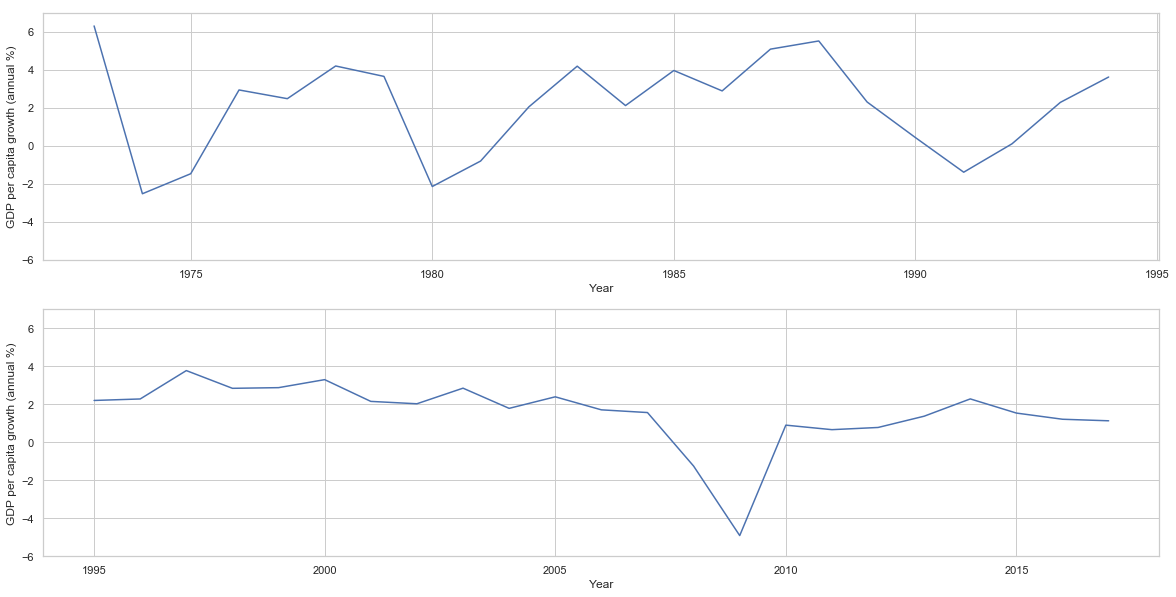

In [21]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
sns.lineplot(x="Year",y= "GDP per capita growth (annual %)", data=df1, ax=ax1)
sns.lineplot(x="Year", y="GDP per capita growth (annual %)", data=df2, ax=ax2)
ax1.set_ylim(-6,7)
ax2.set_ylim(-6,7)
plt.show()

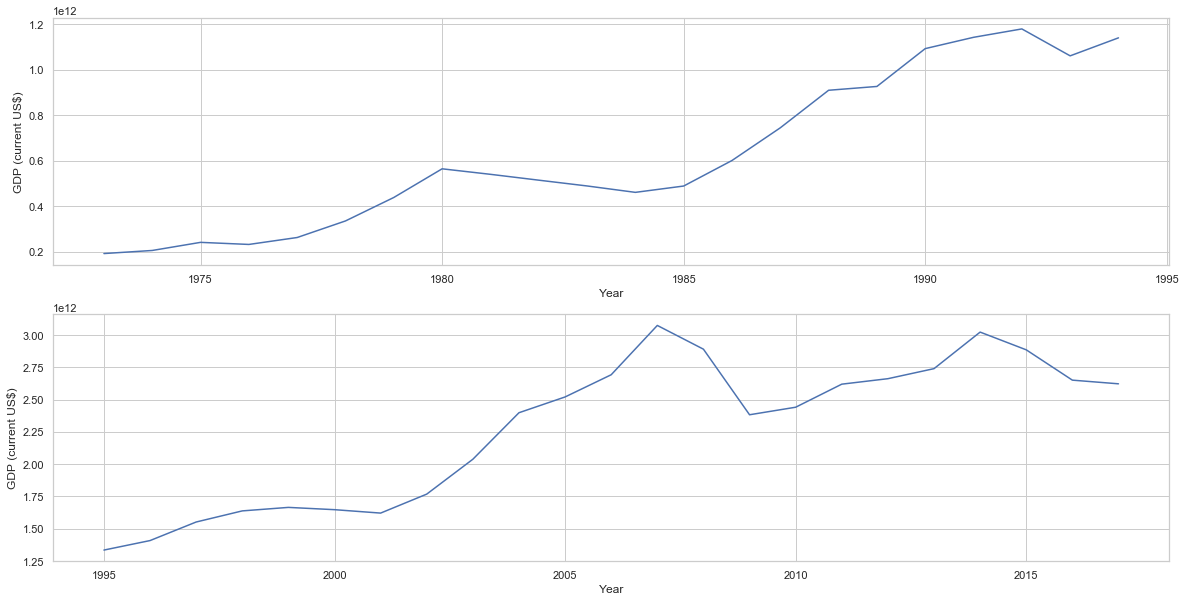

In [18]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
sns.lineplot(x="Year",y= "GDP (current US$)", data=df1, ax=ax1)
sns.lineplot(x="Year", y="GDP (current US$)", data=df2, ax=ax2)


##### Matplotlib

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100, 50)
# plot the data
plt.plot(dfip['Year'],dfip['Total Population'],color ='blue') 
# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Total Population in Irealnd from 1960 -2017', fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total Population', fontsize= 15)
plt.grid(which='both')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
dfip.hist(column="Total Population",        # Column to plot
              figsize=(20,20),         # Plot size
              color="blue",          # Plot color
              bins= 5)#,               # Use 50 bins
              #range= (0,3.5))        # Limit x-axis range

###### Seaborne

https://stackoverflow.com/questions/48225888/matplotlib-finance-candlestick-ohlc-plot-intraday-1min-bar-data-with-time-breaks

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html



In [ ]:

f, (ax1, ax2) = plt.subplots(2,figsize=(50, 10))
sns.boxplot(x= "Total Population", data=dfip, ax=ax1)
sns.lineplot(x="Year", y="Total Population", data=dfip, ax=ax2)

In [ ]:
y_title_margin = 1.2
sns.set(style="white",palette='muted', color_codes=True)
    #rs = np.random.RandomState(10)

    # Set up the matplotlib figure
f, (ax1,ax2,ax3) = plt.subplots(nrows = 3,figsize=(12, 10), sharex=True)
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

    # This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.despine(left=True)

#facetgrid
facet = sns.FacetGrid(dfip, hue="PROC_FLAGS", palette = "Set1");
# #ax1
facet.map(sns.kdeplot,'Total Population',shade= True , bw = 30, kernel='gau', ax = ax1);
#ax2
facet.map(sns.kdeplot,'COV_ALLW_CONTR_AMT_sum',shade= True,bw = 20, ax = ax2);
#ax3
facet.map(sns.kdeplot,'chrg_allw_sum_diff',shade= True, bw = 30,ax = ax3);

#setting stitle name
ax1.set_title("Sum of Charge amount",  y = y_title_margin, fontsize=14)
ax2.set_title("Sum of Allowed amount", y = y_title_margin, fontsize=14)
ax3.set_title("Difference between 'Sum of Charge amount' and 'Sum of Allowed amount'",  y = y_title_margin, fontsize=14)

#ax1
ax1.set_xlabel("Dollars")
ax1.set_ylabel("Probability Distribution")
ax1.set_xlim(-200,300)
ax1.set_ylim(0,0.018)
# title
new_title = 'Type of Claim'
ax1.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax1.legend_.texts, new_labels): t.set_text(l)

#ax2

ax2.set_xlabel("Dollars")
ax2.set_ylabel("Probability Distribution")
ax2.set_xlim(-200,300)
ax2.set_ylim(0,0.018)
#title
new_title = 'Type of Claim'
ax2.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax2.legend_.texts, new_labels): t.set_text(l)
#ax3
ax3.set_xlabel("Dollars")
ax3.set_ylabel("Probability Distribution")
ax3.set_xlim(-200,300)
ax3.set_ylim(0,0.018)
#title
new_title = 'Type of Claim'
ax3.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax3.legend_.texts, new_labels): t.set_text(l)

plt.tight_layout()
plt.close()

